# SVM

## Agenda:

1. SVM
    - Discription
2. Abalone Data set
    - Load data
    - EDA
    - Standardizing the input
3. Build Logistic Regesion 
4. Build SVM
5. Grid search 
6. Logistic Regression with PCA
7. SVM wit PCA
8. Parameters Tuning
9. Pros and Cons


## Support Vector Machine:
is a supervised machine learning algorithm which can be used for both **classification(SVM) or regression(SVR)** challenges. However,  it is mostly used in classification problems. we perform classification by finding the hyper-plane that differentiate the classes very well.

The right hyper-plane can be identified with the mathameticl models like maximzing **Margin** and **Kernel Tricks**.

**Margin** is the distances between nearest data point in between class which helps to find right hyper-plane.

**Kernel Tricks:** Set of functions which takes low dimensional input space and transform it to a higher dimensional space i.e. it converts not separable problem to separable problem, these functions are called kernels. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then find out the process to separate the data based on the labels or outputs.

## Abalone Data Set
Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

**Attribute Information:**
Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. Link=https://archive.ics.uci.edu/ml/datasets/Abalone

**Name / Data Type / Measurement Unit / Description**
- Sex / nominal / -- / M, F, and I (infant) 
- Length / continuous / mm / Longest shell measurement 
- Diameter	/ continuous / mm / perpendicular to length 
- Height / continuous / mm / with meat in shell 
- Whole weight / continuous / grams / whole abalone 
- Shucked weight / continuous	/ grams / weight of meat 
- Viscera weight / continuous / grams / gut weight (after bleeding) 
- Shell weight / continuous / grams / after being dried 
- Rings / integer / -- / +1.5 gives the age in years 

**The objective of the assignment is to analyze the abalone dataset and apply different models and understand which model is better in terms of performance.**

In [1]:
your_local_path="C:/Users/s.mudalapuram/Documents/PythonMe/data/"

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14


C:\Users\s.mudalapuram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\s.mudalapuram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
df=pd.read_csv(your_local_path+"abalone.csv")

# Exploratory Data Analysis

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


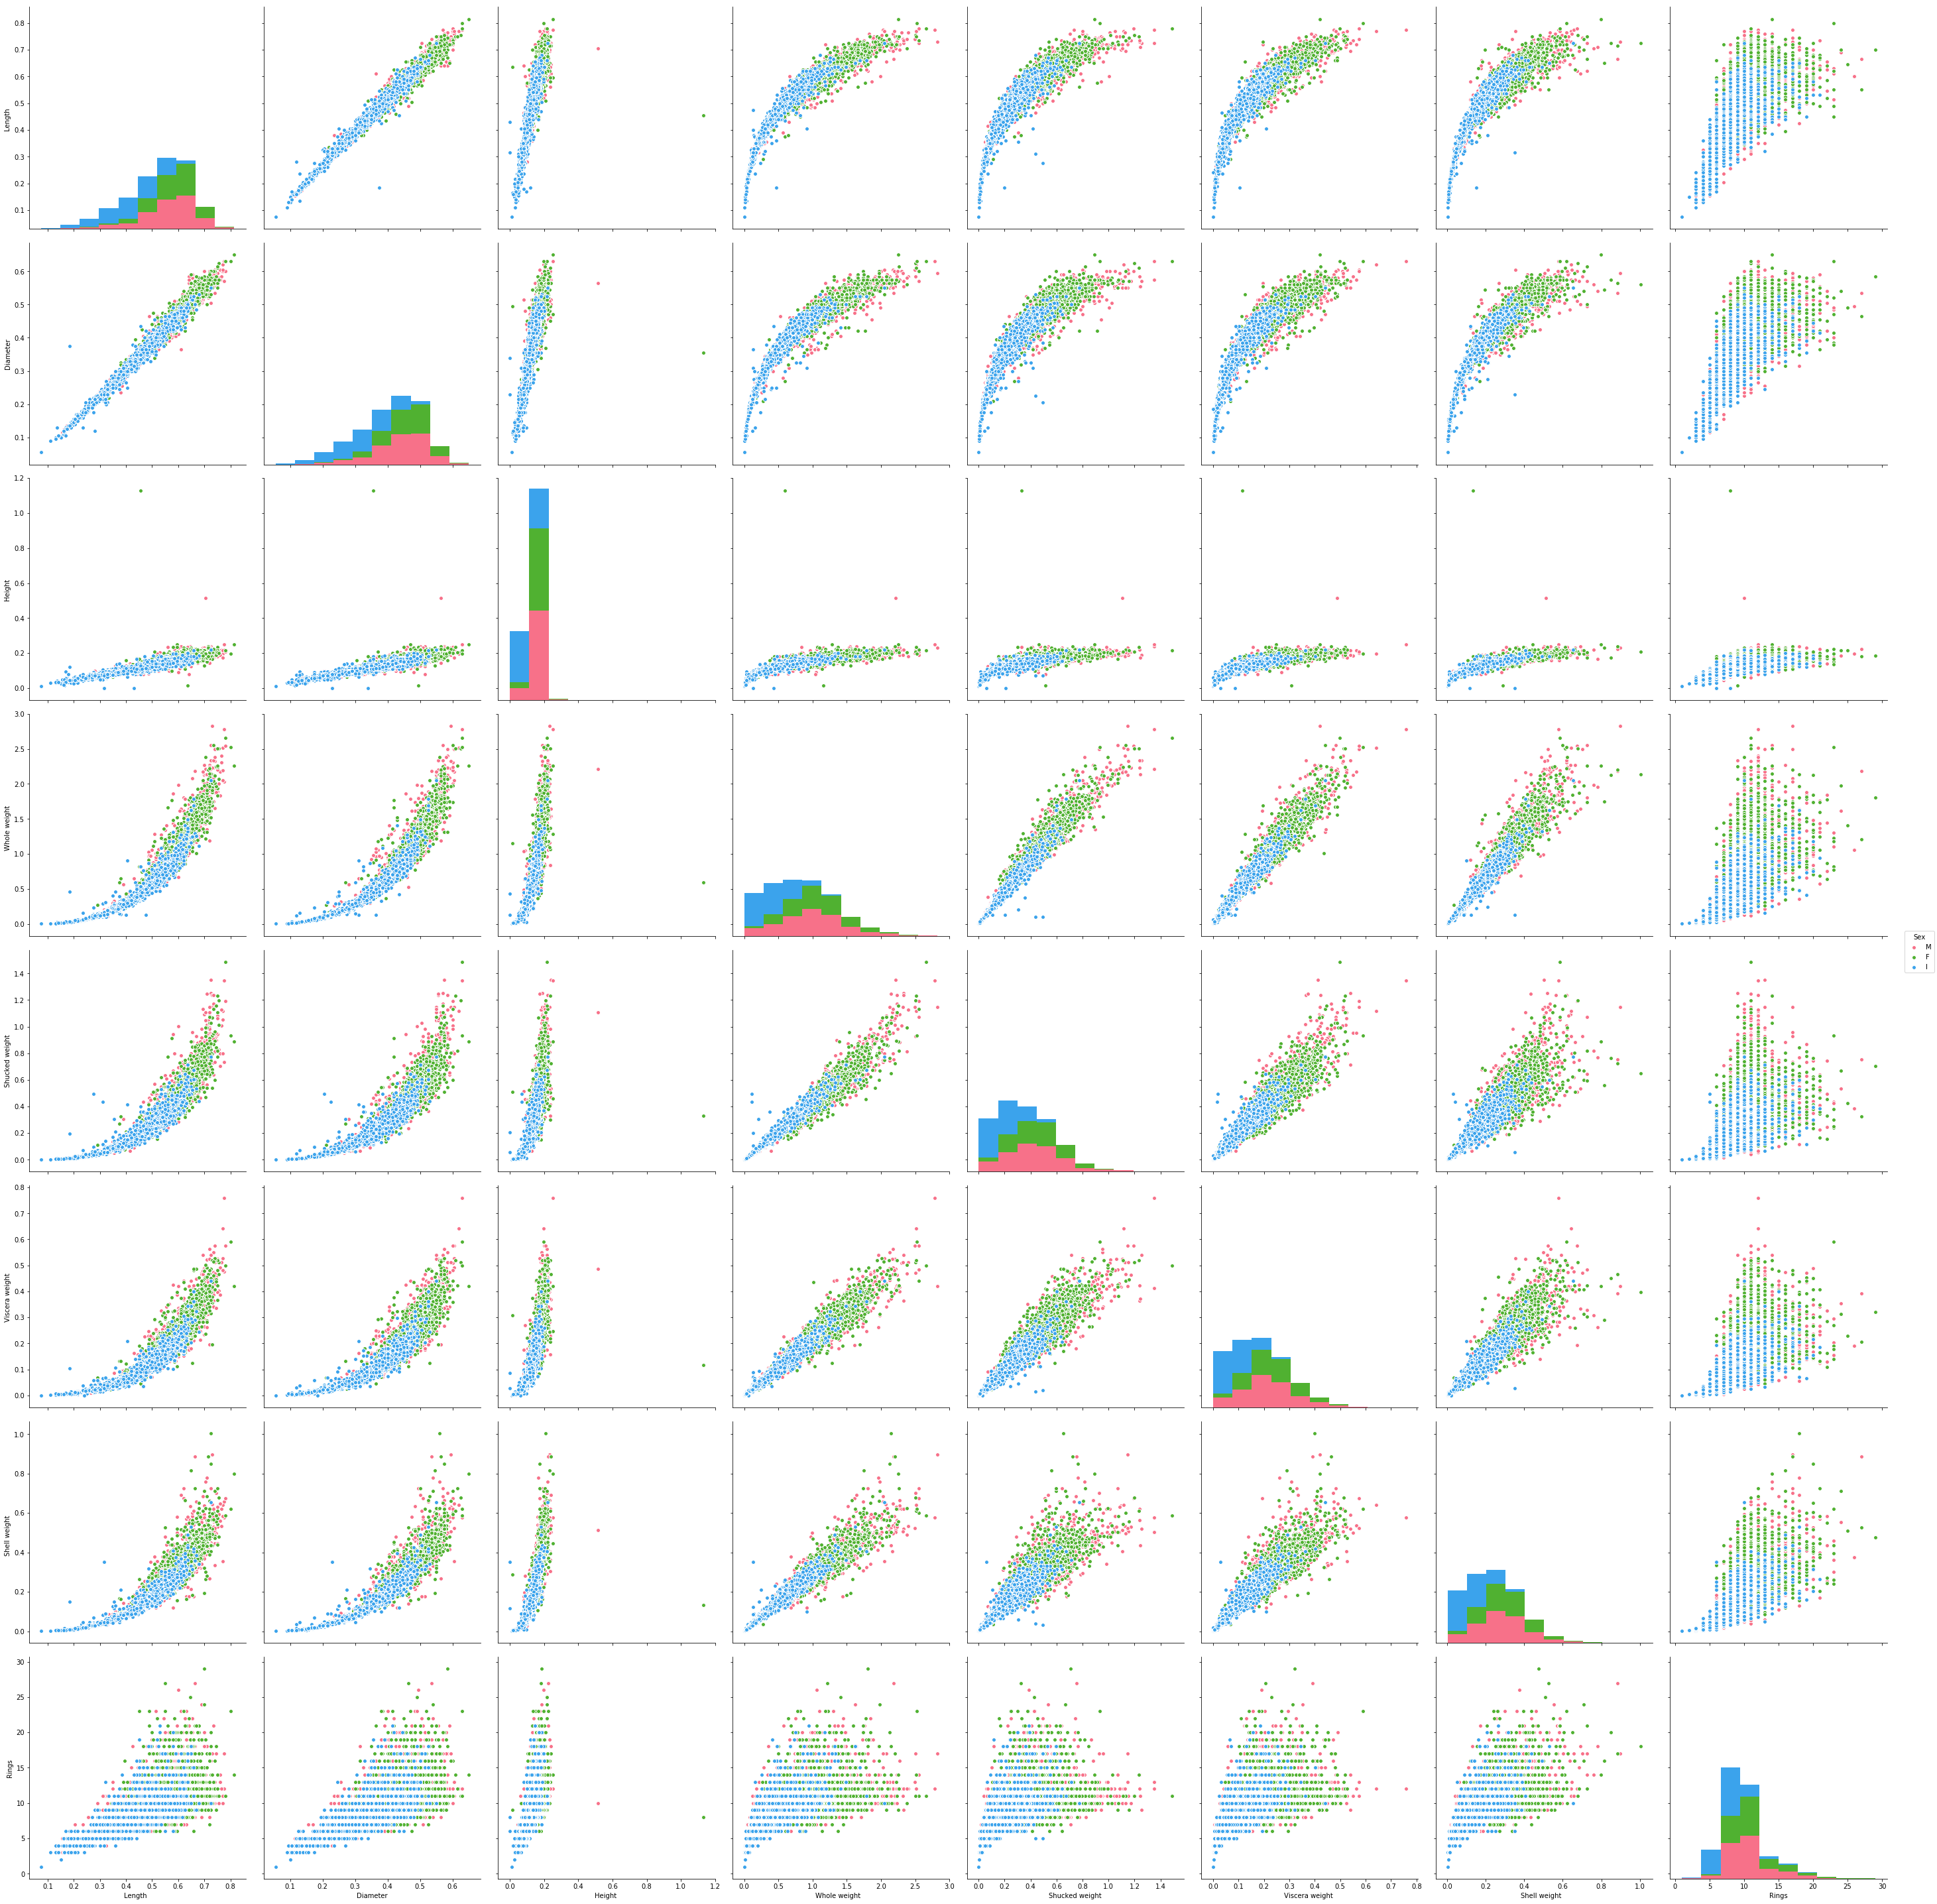

In [5]:
# Scatter Plot
# color pallete- http://seaborn.pydata.org/tutorial/color_palettes.html
import seaborn as sns
sns.pairplot(df, hue="Sex", palette="husl", size =5)
plt.show()

Pair plot gives the corelation between features in the dataset.

In [6]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [7]:
df.columns = [c.strip() for c in df.columns]

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
y=df.Sex
feature_cols = ['Length','Height','Shucked weight','Rings']
x=df[feature_cols]


In [10]:
x.head()

,Length,Height,Shucked weight,Rings
0,0.455,0.095,0.2245,15
1,0.350,0.090,0.0995,7
2,0.530,0.135,0.2565,9
3,0.440,0.125,0.2155,10
4,0.330,0.080,0.0895,7


In [11]:
x.corr()

,Length,Height,Shucked weight,Rings
Length,1.000000,0.827554,0.897914,0.556720
Height,0.827554,1.000000,0.774972,0.557467
Shucked weight,0.897914,0.774972,1.000000,0.420884
Rings,0.556720,0.557467,0.420884,1.000000


# Standardizing the input

**Time for some preprocessing** - Observe how the 'Rings' column has integer values whereas every other column contains floating point numbers.

In [12]:
#Standardizing the input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_transformed=ss.fit_transform(x)
x = x_transformed

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3759, 4)
(418, 4)
(3759,)
(418,)


# Logistic Regression

In [14]:
## Building the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_model=log_reg.fit(x_train,y_train)
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [15]:
## Prediction with logistic regression model
log_prd=log_model.predict(x_test)
print(accuracy_score(y_test,log_prd))
print(confusion_matrix(y_test,log_prd))
print(classification_report(y_test,log_prd))

0.5669856459330144
[[ 41  25  52]
 [ 11 113  13]
 [ 41  39  83]]
             precision    recall  f1-score   support

          F       0.44      0.35      0.39       118
          I       0.64      0.82      0.72       137
          M       0.56      0.51      0.53       163

avg / total       0.55      0.57      0.55       418



# SVC

In [16]:
#Prediction with SVC model
clf=SVC(kernel='linear', decision_function_shape='ovr')
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.569377990430622
[[  8  18  92]
 [  1 111  25]
 [  9  35 119]]
             precision    recall  f1-score   support

          F       0.44      0.07      0.12       118
          I       0.68      0.81      0.74       137
          M       0.50      0.73      0.60       163

avg / total       0.54      0.57      0.51       418



# Perform GridSearch

In [18]:
params={"kernel":('linear','rbf'),"C":[1,50,100],"gamma":[0.03,1,10],"decision_function_shape":('ovr','ovo')}## Please keep patience, It'll take long time

In [19]:
grid=GridSearchCV(clf,params)
grid_model=grid.fit(x_train,y_train)

In [20]:
grid_model.best_params_

{'C': 100, 'decision_function_shape': 'ovr', 'gamma': 0.03, 'kernel': 'rbf'}

In [21]:
grid_pred=grid_model.predict(x_test)

In [22]:
print(accuracy_score(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

0.5861244019138756
[[ 20  16  82]
 [  6 109  22]
 [ 15  32 116]]
             precision    recall  f1-score   support

          F       0.49      0.17      0.25       118
          I       0.69      0.80      0.74       137
          M       0.53      0.71      0.61       163

avg / total       0.57      0.59      0.55       418



# Applying PCA

[0.76284089 0.16049505 0.05517111 0.02149294]


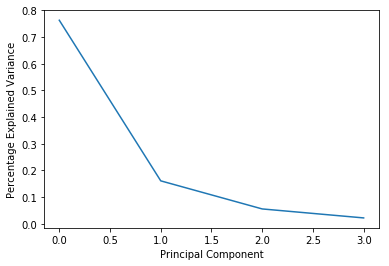

In [23]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=4)
pca_model.fit(x)
print (pca_model.explained_variance_ratio_)
#Plot the explained variance
plt.plot(pca_model.explained_variance_ratio_);
plt.xlabel('Principal Component');
plt.ylabel('Percentage Explained Variance');

In [24]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(204,0.5,'Principal components')

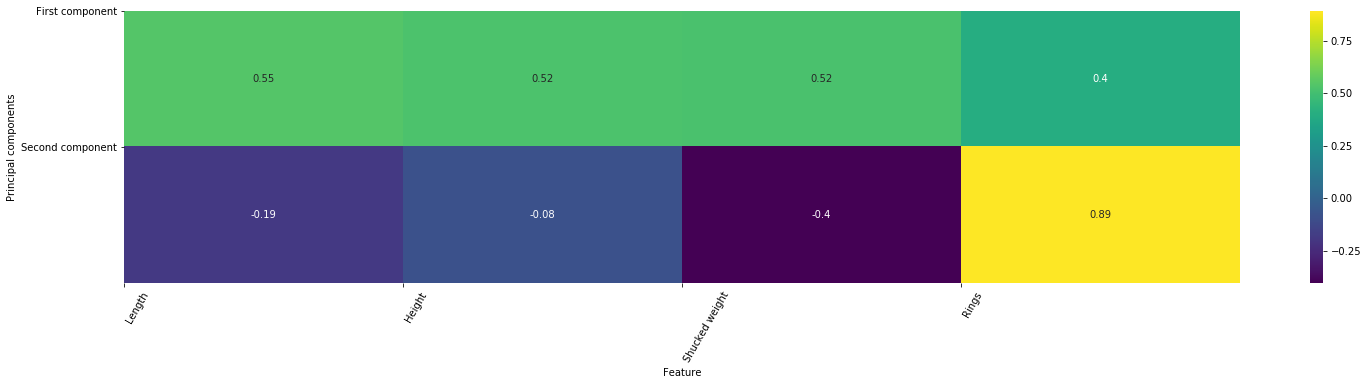

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Visualize coefficients using heat map
plt.figure(figsize=[25,5])
sns.heatmap(pca_model.components_[0:2,:],annot=True,cmap='viridis')
plt.yticks([0,1],["First component","Second component"],rotation=360,ha="right")
plt.xticks(range(len(feature_cols)),feature_cols,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [26]:
x_pca = PCA(n_components=2)
#Build a PCA model with just the training data
train_pca = x_pca.fit_transform(x_train)
#Fit the test data to the above PCA model
test_pca = x_pca.fit_transform(x_test)

In [27]:
test_pca

array([[-3.75746374e+00, -1.61264928e-01],
       [ 1.70479879e+00, -9.00232118e-01],
       [-1.29414646e+00,  2.90220184e-01],
       [ 6.95665161e-01, -5.02110555e-01],
       [ 6.22197300e-01,  1.18838582e+00],
       [ 4.51076224e-02,  1.44661178e+00],
       [ 2.54362222e+00, -8.05317458e-01],
       [ 4.78356267e-01, -4.92573352e-01],
       [ 1.88856160e+00,  6.30341279e-01],
       [-2.93553046e+00, -1.04171987e-01],
       [-3.20450796e-01, -4.52665405e-01],
       [-6.71983878e-01, -6.16349693e-01],
       [-1.50336176e-02, -7.00680671e-01],
       [ 1.92211239e+00, -5.43824683e-01],
       [ 7.02505289e-01, -2.76096455e-01],
       [-1.94561794e+00,  5.94642609e-01],
       [ 3.54075623e-01,  1.58557697e+00],
       [ 1.16756422e+00, -4.29561874e-01],
       [-1.55813390e+00, -2.48750421e-01],
       [ 3.61109342e-01, -7.09323417e-01],
       [-3.78975568e+00, -1.40291650e-01],
       [ 2.35979583e+00, -4.24817369e-01],
       [ 2.06637087e+00, -4.74330689e-01],
       [ 1.

In [28]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pcalg = LogisticRegression(C=1e42)

# fit model
pcalg.fit(train_pca, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# make class predictions for the testing set
y_pred_class_pca = pcalg.predict(test_pca)

In [30]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class_pca))
print (metrics.precision_recall_fscore_support(y_test, y_pred_class_pca, average='weighted'))
print(metrics.confusion_matrix(y_test,y_pred_class_pca))

0.5598086124401914
(0.53500251250017, 0.5598086124401914, 0.529731289724013, None)
[[ 21  19  78]
 [  4 109  24]
 [ 26  33 104]]


In [31]:
#Prediction with SVC model
clf=SVC(kernel='linear',C=164, decision_function_shape='ovr')
model=clf.fit(train_pca,y_train)
y_pred=model.predict(test_pca)
clf

SVC(C=164, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.569377990430622
[[  0  16 102]
 [  0 104  33]
 [  0  29 134]]
             precision    recall  f1-score   support

          F       0.00      0.00      0.00       118
          I       0.70      0.76      0.73       137
          M       0.50      0.82      0.62       163

avg / total       0.42      0.57      0.48       418



C:\Users\s.mudalapuram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Parameters Tuning:
**Kernel:** we have various options available with kernel like, “linear”, “rbf”,”poly” and others (default value is “rbf”).  Here “rbf” and “poly” are useful for non-linear hyper-plane.

**gamma:** Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma. Should not be very less and very high.

**C:** Penalty parameter C of the error term. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

We should look at the cross validation score to have effective combination of these parameters and avoid over-fitting.

# Pros and Cons associated with SVM
**Pros:**
- It works really well with clear margin of separation
- It is effective in high dimensional spaces.
- It is effective in cases where number of dimensions is greater than the number of samples.
- It IS  memory efficient.

**Cons:**
- It doesn’t perform well, when we have large data set because the required training time is higher
- It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
- SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.